How it should look:
A single matrix should be a transmission line matrix of length 9mm. To the inductance of this matrix should be added the inducatanceof the discrete inductor. This should be multiplied by the matrix of a capacitor.

dimensions:
cell length 9 mm
capacitor length 0.5 mm
C_0 = 0.13616e-12 f/mm
L_0 = 0.23815e-9 h/mm


In [190]:
function tl_matrix(l, Z, omega)
    return [cos(omega*l) im*Z*sin(omega*l) ; (im/Z)*sin(omega*l) cos(omega*l)];
end

function capacitor_matrix(C, omega)
    return [1 1/(im*omega*C); 0 1];
end


capacitor_matrix (generic function with 1 method)

In [255]:
Length = 95;
dx = 0.05;
N = Int64(Length/dx);
result_matrix = zeros(ComplexF64, 2, N + 1) 
result_matrix[:, 1] = [1 ; 1/50]

C_0 = 0.136e-12; # farad/mm
L_0 = 0.238e-9; # henry/mm
d = 9; # mm
C = 2.7e-12; # farad
L = 2.8e-9; # henry

L_tot_per_unit_length = (N*L + L_0); # henry/mm
Z_0 = (L_tot_per_unit_length/C_0)^0.5; # ohm
Z_1 = (L_0/(C_0 + C/0.5))^0.5; # ohm


omega = 2*pi*0.2e9; # Hz
beta = omega *(L_tot_per_unit_length*C_0*dx^2)^0.5; # Hz/mm
beta2 = omega *(0.01e-9 *C_0*dx^2)^0.5; # Hz/mm

for i = 0:9  # iterating over cells
     # buliding each cell
    for j = 1:Int64(9/dx) # the transmission line part
        result_matrix[:, (190)*i + j+1] = tl_matrix(dx,Z_0, beta)*result_matrix[:, 190*i + j];
    end

    for k = 1:Int64(0.5/dx) # the capcictor part
        result_matrix[:, 190*i + Int64(9/dx) + k + 1] = 
        (capacitor_matrix(C*(0.5/dx), omega) * tl_matrix(dx,Z_1, beta2))*result_matrix[:, 190*i + Int64(9/dx) + k]; # 
    end
end



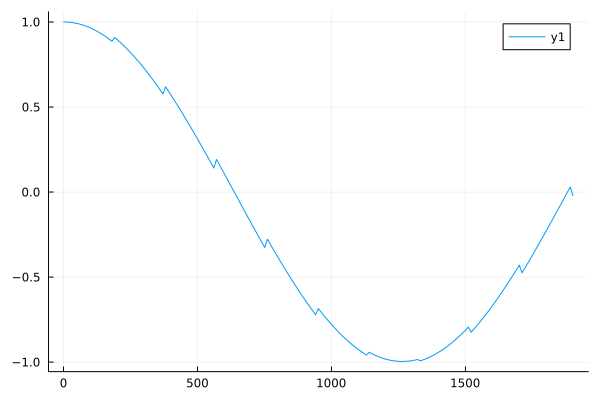

In [256]:
plot(real(result_matrix[1,:]))

In [244]:
(capacitor_matrix(C*10, omega) * tl_matrix(dx,Z_1, beta2))*(1/2)*[1+im ; 1+im]

2-element Vector{ComplexF64}:
 1.4822659871051864 - 0.48224952006910426im
 0.4999958085104284 + 0.5000041899795221im

In [201]:
(capacitor_matrix(1,1)^803)*(1/2^0.2)*[1 ; 1]

2-element Vector{ComplexF64}:
 0.8705505632961241 - 699.0521023267877im
 0.8705505632961241 + 0.0im

In [233]:
beta

0.008016893458234482